# Kachra Rani 
## Team:
### 1. Syed Hassan Haider
### 2. Inara Naseem G H Chagani 
### 3. Muhammad Shahrom Ali 

In [78]:
# Input: Image 
# Output : Label for that Image 

# Steps: 
# 1. Loading Image and Preprocessing 
# 2. Defining Model Architecture 
# 3. Training the Model 
# 4. Estimation of performance

In [79]:
# Imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')

In [80]:
# Supporting information defined 

dataset_info = {
    # FORMAT::garbage_type : (type_img_count, label_value)
    'glass' : (501, 0),
    'plastic' : (482, 1),
    'cardboard' : (403, 2),
    'paper' : (594, 3),
    'metal' : (410, 4),
    'trash' : (137, 5)
}

#Label_value (int) : garbage_type (string)
labels = {dataset_info[i][1] : i for i in dataset_info}

In [81]:
#Load data 
KR_dataset = list()
for garbage_type in dataset_info:
    
    img_count = dataset_info[garbage_type][0]
    garbage_label = dataset_info[garbage_type][1]
    
    for i in range(1,  img_count + 1):
        img_path = './Dataset/' + garbage_type + "/" + garbage_type + str(i) + '.jpg'
        KR_dataset.append((mpimg.imread(img_path), garbage_label))
        
KR_dataset = np.array(KR_dataset, dtype=object)
#DATASET LOADED

In [82]:
##Break into train and test dataset - 70:30 split

train_ratio = 0.7 #Only change this 
test_ratio = 1 - train_ratio

train_size = int(KR_dataset.shape[0] * train_ratio) + 1

#Shuffle the dataset 
for i in range(3):
    np.random.shuffle(KR_dataset)

x_train = [KR_dataset[i][0] for i in range(0, train_size)]
y_train = [(KR_dataset[i][1],) for i in range(0, train_size)]

x_test = [KR_dataset[i][0] for i in range(train_size, KR_dataset.shape[0])]
y_test = [(KR_dataset[i][1],) for i in range(train_size, KR_dataset.shape[0])]

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train shape: (1769, 384, 512, 3)
y_train shape: (1769, 1)
Garbage Type at index 0 : paper
x_test shape: (758, 384, 512, 3)
x_test shape: (758, 1)
Garbage Type at index 1769 : glass


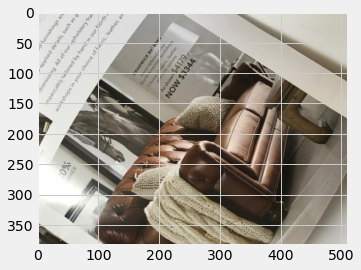

In [83]:
ind = 0

print("x_train shape:", x_train.shape)
plt.imshow(x_train[ind])

print("y_train shape:", y_train.shape)
print("Garbage Type at index", ind, ": " + labels[y_train[ind][0]])

print("x_test shape:", x_test.shape)
# plt.imshow(x_test[ind])

print("x_test shape:", y_test.shape)
print("Garbage Type at index", x_train.shape[0] + ind, ": " + labels[y_test[ind][0]])

the image label is paper


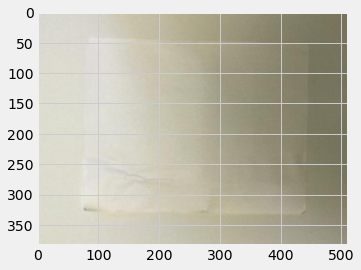

In [84]:
index = 451
# x_train[index]
plt.imshow(x_train[index])
print("the image label is", labels[y_train[index][0]])

In [85]:
#convert the labels into a set of numbers to input into the neural network
y_train_one_hot = keras.utils.to_categorical(y_train)
y_test_one_hot = keras.utils.to_categorical(y_test)

In [87]:
# print(y_train_one_hot)
# print("number of collumns in one hot encoding:", len(y_train_one_hot[0]))

print("the one hot image label is", y_trainy_train_one_hotndex])

the one hot image label is [0. 0. 0. 1. 0. 0.]


In [88]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255 

In [89]:
x_train[index]

array([[[0.83529412, 0.83529412, 0.80392157],
        [0.83921569, 0.83921569, 0.80784314],
        [0.84313725, 0.84313725, 0.81176471],
        ...,
        [0.47058824, 0.44705882, 0.36078431],
        [0.46666667, 0.44313725, 0.35686275],
        [0.4627451 , 0.43921569, 0.35294118]],

       [[0.83529412, 0.83529412, 0.80392157],
        [0.83921569, 0.83921569, 0.80784314],
        [0.84313725, 0.84313725, 0.81176471],
        ...,
        [0.47058824, 0.44705882, 0.36078431],
        [0.46666667, 0.44313725, 0.35686275],
        [0.4627451 , 0.43921569, 0.35294118]],

       [[0.83921569, 0.83921569, 0.80784314],
        [0.83921569, 0.83921569, 0.80784314],
        [0.84313725, 0.84313725, 0.81176471],
        ...,
        [0.47058824, 0.44705882, 0.36078431],
        [0.46666667, 0.44313725, 0.35686275],
        [0.4627451 , 0.43921569, 0.35294118]],

       ...,

       [[0.85882353, 0.85098039, 0.79215686],
        [0.85882353, 0.85098039, 0.79215686],
        [0.85490196, 0

In [92]:
#Models  architecture

model = Sequential()

#add the first layer 
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(384, 512, 3)))

#add a pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convolution layer 
model.add(Conv2D(32, (5, 5), activation='relu'))

#add another pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#add a flattening layer 
model.add(Flatten())

#Add a layer with 1000 neurons 
model.add(Dense(1000, activation='relu'))

#add a drop out layer - reduce to 50% size  
model.add(Dropout(0.5))

#Add another layer with 50% of original neurons 
model.add(Dense(500, activation='relu'))

#add another drop out layer 
model.add(Dropout(0.5))

#Add another layer with 50% of original neurons 
model.add(Dense(250, activation='relu'))

#Add another layer, with 6 neurons 
model.add(Dense(6, activation='softmax'))

In [95]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [94]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, 
                batch_size = 256, 
                epochs = 10, 
                validation_split = 0.2)

Epoch 1/10


ResourceExhaustedError: in user code:

    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:757 train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:498 minimize
        return self.apply_gradients(grads_and_vars, name=name)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:604 apply_gradients
        self._create_all_weights(var_list)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:783 _create_all_weights
        self._create_slots(var_list)
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\adam.py:127 _create_slots
        self.add_slot(var, 'm')
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:847 add_slot
        weight = tf_variables.Variable(
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\variables.py:262 __call__
        return cls._variable_v2_call(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\variables.py:244 _variable_v2_call
        return previous_getter(
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\variables.py:67 getter
        return captured_getter(captured_previous, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3332 creator
        return next_creator(**kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\variables.py:67 getter
        return captured_getter(captured_previous, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3332 creator
        return next_creator(**kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\variables.py:67 getter
        return captured_getter(captured_previous, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3332 creator
        return next_creator(**kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\variables.py:67 getter
        return captured_getter(captured_previous, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\eager\def_function.py:712 variable_capturing_scope
        v = UnliftedInitializerVariable(
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\variables.py:264 __call__
        return super(VariableMetaclass, cls).__call__(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\eager\def_function.py:227 __init__
        initial_value = initial_value()
    c:\program files\python38\lib\site-packages\tensorflow\python\keras\initializers\initializers_v2.py:139 __call__
        return super(Zeros, self).__call__(shape, dtype=_get_dtype(dtype), **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\init_ops_v2.py:154 __call__
        return array_ops.zeros(shape, dtype)
    c:\program files\python38\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\array_ops.py:2819 wrapped
        tensor = fun(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\array_ops.py:2880 zeros
        output = fill(shape, constant(zero, dtype=dtype), name=name)
    c:\program files\python38\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\array_ops.py:239 fill
        result = gen_array_ops.fill(dims, value, name=name)
    c:\program files\python38\lib\site-packages\tensorflow\python\ops\gen_array_ops.py:3347 fill
        _ops.raise_from_not_ok_status(e, name)
    c:\program files\python38\lib\site-packages\tensorflow\python\framework\ops.py:6862 raise_from_not_ok_status
        six.raise_from(core._status_to_exception(e.code, message), None)
    <string>:3 raise_from
        

    ResourceExhaustedError: OOM when allocating tensor with shape[372000,1000] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Fill]
